In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv


# **Importing Necessary Modules**

In [31]:
from sklearn.dummy import DummyRegressor 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
import numpy as np
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# **Loading Dataset**

In [32]:
df = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
0,0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,NaN,40.0,64173
1,1,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,16.08,26.0,4357
2,2,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2.92,25.0,3251
3,3,NaN,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.50,22.0,1776
4,4,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4.83,20.0,3584
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,Vistara,UK-940,Mumbai,NaN,one,Evening,Bangalore,Economy,21.25,43.0,6450
39996,39996,Vistara,UK-720,Kolkata,Early_Morning,one,Night,Mumbai,Business,14.08,12.0,64831
39997,39997,NaN,UK-874,Hyderabad,Morning,one,Night,Bangalore,Economy,14.33,NaN,8062
39998,39998,Vistara,UK-940,Mumbai,NaN,one,Night,Bangalore,Business,24.67,4.0,84557


In [33]:
dft = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv")

# **Data Types of different columns**

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           40000 non-null  int64  
 1   airline      35387 non-null  object 
 2   flight       40000 non-null  object 
 3   source       40000 non-null  object 
 4   departure    35208 non-null  object 
 5   stops        37681 non-null  object 
 6   arrival      40000 non-null  object 
 7   destination  40000 non-null  object 
 8   class        40000 non-null  object 
 9   duration     36987 non-null  float64
 10  days_left    35562 non-null  float64
 11  price        40000 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


# **Descriptive Statistics of Numerical Variables**

In [67]:
df.describe()

,id,duration,days_left,price
count,40000.00000,36987.000000,35562.000000,40000.00000
mean,19999.50000,12.004088,26.197936,20801.49025
std,11547.14972,7.108063,13.469232,22729.14842
min,0.00000,0.830000,1.000000,1105.00000
25%,9999.75000,6.670000,15.000000,4687.00000
50%,19999.50000,11.080000,26.000000,7353.00000
75%,29999.25000,15.920000,38.000000,42521.00000
max,39999.00000,47.080000,49.000000,114704.00000


# **Checking number of missing values in each columns**

In [68]:
print("Missing Values in each column")
df.isnull().sum()

Missing Values in each column


id                0
airline        4613
flight            0
source            0
departure      4792
stops          2319
arrival           0
destination       0
class             0
duration       3013
days_left      4438
price             0
dtype: int64

# **Seperating X and Y Values**

In [69]:
x = df.drop("price", axis=1)
y = df["price"]

# **Imputing / Handling Missing Values**

In [70]:
cat = x.select_dtypes(include=["object"]).columns.tolist()
num = x.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(cat, num)

['airline', 'flight', 'source', 'departure', 'stops', 'arrival', 'destination', 'class'] ['id', 'duration', 'days_left']


### **Changing Id from Numerical Variable to Categorical Variable**

In [71]:
if "id" in num:
    if "id" not in cat:
        cat.append("id")
        num.remove("id")
print(cat, num)

['airline', 'flight', 'source', 'departure', 'stops', 'arrival', 'destination', 'class', 'id'] ['duration', 'days_left']


In [72]:
imp1 = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="median"), num),
    ("cat", SimpleImputer(strategy="most_frequent"), cat)
])
x1 = imp1.fit_transform(x)
x2 = pd.DataFrame(x1, columns=num+cat)
x2

,duration,days_left,airline,flight,source,departure,stops,arrival,destination,class,id
0,11.08,40.0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,0
1,16.08,26.0,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,1
2,2.92,25.0,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2
3,1.5,22.0,Vistara,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,3
4,4.83,20.0,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4
...,...,...,...,...,...,...,...,...,...,...,...
39995,21.25,43.0,Vistara,UK-940,Mumbai,Morning,one,Evening,Bangalore,Economy,39995
39996,14.08,12.0,Vistara,UK-720,Kolkata,Early_Morning,one,Night,Mumbai,Business,39996
39997,14.33,26.0,Vistara,UK-874,Hyderabad,Morning,one,Night,Bangalore,Economy,39997
39998,24.67,4.0,Vistara,UK-940,Mumbai,Morning,one,Night,Bangalore,Business,39998


# **Identifying and Handling Duplicates**

In [73]:
x2.duplicated().sum()

0

### **There are no duplicates in this dataset as seen from the output of the above code block. So, no need to handle duplicates**

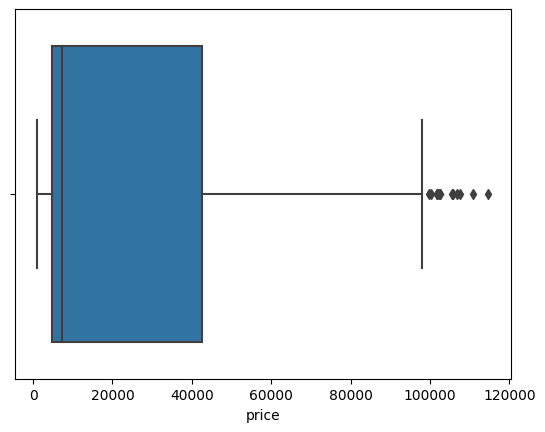

In [74]:
sns.boxplot(x=y)
plt.show()

## **Function to filter outliers**

In [75]:
def outliers(x_or_y, name):
    if x_or_y == 0:
        q1 = x2[name].quantile(0.25)
        q3 = x2[name].quantile(0.75)
        iqr = q3 - q1
        e =  x2[((x2[name] < (q1-1.5*(iqr))) | (x2[name] > (q3+1.5*(iqr))))]
        et = e.index.tolist()
        return (e, y.iloc[et])
    elif x_or_y == 1:
        q1 = y.quantile(0.25)
        q3 = y.quantile(0.75)
        iqr = q3 - q1
        e =  y[((y < (q1-1.5*(iqr))) | (y > (q3+1.5*(iqr))))]
        et = e.index.tolist()
        return (x2.iloc[et], e)
    

###  **Outliers of Duration Column**

In [76]:
ex, ey = outliers(0, "duration")
print(ex)
print(ey)
print(ex.shape)
print(tuple(ex.shape)[0], " rows are outliers in the dataset in accordance to duration column")

      duration days_left    airline  flight   source      departure  \
73       33.67      26.0    Vistara  UK-706  Kolkata        Morning   
141       33.0      27.0  Air_India  AI-672  Chennai      Afternoon   
162      29.17      26.0  Air_India  AI-429  Chennai      Afternoon   
239      28.25      26.0    Vistara  UK-813    Delhi        Morning   
342      28.33      34.0  Air_India  AI-764    Delhi        Morning   
...        ...       ...        ...     ...      ...            ...   
39415    31.58      15.0  Air_India  AI-809   Mumbai        Morning   
39795    30.08      30.0  Air_India  AI-766  Chennai        Morning   
39800    38.58      16.0  Air_India  AI-440  Chennai  Early_Morning   
39827     30.0      31.0  Air_India  AI-672  Chennai      Afternoon   
39985     30.5       4.0  Air_India  AI-424  Kolkata      Afternoon   

             stops  arrival destination     class     id  
73     two_or_more  Evening     Chennai   Economy     73  
141            one    Night  

###  **Outliers of Days Left Column**

In [77]:
ex, ey = outliers(0, "days_left")
print(ex)
print(ey)
print(ex.shape)
print(tuple(ex.shape)[0], " rows are outliers in the dataset in accordance to days_left column")

Empty DataFrame
Columns: [duration, days_left, airline, flight, source, departure, stops, arrival, destination, class, id]
Index: []
Series([], Name: price, dtype: int64)
(0, 11)
0  rows are outliers in the dataset in accordance to days_left column


###  **Outliers of Price Column - Target Variable**

In [78]:
ex, ey = outliers(1, "price")
print(ex)
print(ey)
print(ex.shape)
print(tuple(ex.shape)[0], " rows are outliers in the dataset in accordance to price column, which is the target variable")

      duration days_left  airline  flight     source      departure  \
3025     28.17       2.0  Vistara  UK-996     Mumbai        Evening   
4123     20.58       3.0  Vistara  UK-776    Kolkata        Morning   
10056    16.33       7.0  Vistara  UK-910     Mumbai        Evening   
10688    11.17      17.0  Vistara  UK-772    Kolkata        Morning   
12077      9.5       4.0  Vistara  UK-772    Kolkata        Morning   
13000     10.0       4.0  Vistara  UK-706    Kolkata        Morning   
15928    13.33       5.0  Vistara  UK-772    Kolkata        Morning   
20894    15.08       5.0  Vistara  UK-832    Chennai        Morning   
20931     6.25       3.0  Vistara  UK-836    Chennai        Morning   
24173    25.25      26.0  Vistara  UK-910     Mumbai        Evening   
25237    11.17      14.0  Vistara  UK-772    Kolkata        Morning   
26185    15.92       5.0  Vistara  UK-832    Chennai  Early_Morning   
28734    14.42       5.0  Vistara  UK-814  Bangalore          Night   
35460 

## **It can be seen that, from the three numerical variables and their outliers - the following inferences can be observed** 
### 1. Duration - The outliers are logically right as the overall duration of a flight with one or more than one stops in between can take values above 30 hours also and in some extreme cases, they could reach 47 hours, which is logically right and need not be removed
### 2. Days_Left - There are no outliers - so nothing to remove
### 3. Price - There are some outliers with values reaching Rs. 1 Lakh, which is logically right as a business class ticket with more than one stops, on one of the longest routes within India could reach Rs. 1 Lakh, so it is logically right. So, even these rows are not required to be removed

## **Function to remove outliers and create a new dataframe without outliers**

In [79]:
def remove_outliers():
    q1 = x2["duration"].quantile(0.25)
    q3 = x2["duration"].quantile(0.75)
    iqr = q3 - q1
    e =  x2[((x2["duration"] < (q1-1.5*(iqr))) | (x2["duration"] > (q3+1.5*(iqr))))]
    et = e.index.tolist()
    q1 = y.quantile(0.25)
    q3 = y.quantile(0.75)
    iqr = q3 - q1
    e1 =  y[((y < (q1-1.5*(iqr))) | (y > (q3+1.5*(iqr))))]
    et1 = e1.index.tolist()
    et2 = et + et1
    et3 = [i for i in range(len(x2)) if i not in et2]
    return (x2.iloc[et3], y.iloc[et3])

## **Creating Dataset after removing outlier**

In [ ]:
x_without_outliers, y_without_outliers = remove_outliers()
x_without_outliers

# **Visualisation of 3 variables**

### **Visualisation of duration variable using Histogram with kernel density estimation**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


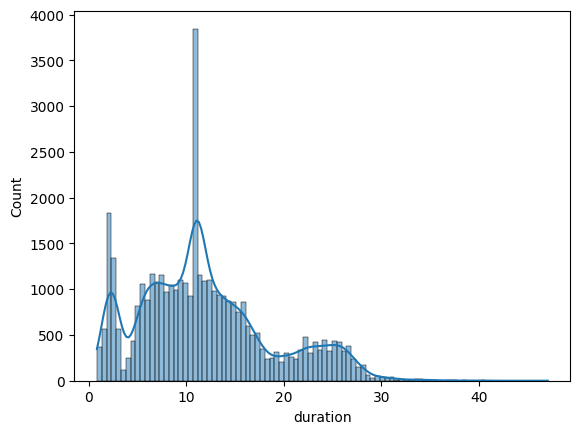

In [80]:
sns.histplot(x2["duration"], kde=True)
plt.show()

### **The duration is distributed like a mixture of Normal (Gaussian) distributions. With peaks observed near 2 Hours and 12 hours. This shows that most of the direct flights have duration near 2 hours and indirect flights have duration situated near 12 hours**

### **Visualisation of days_left variable using Histogram with kernel density estimation**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


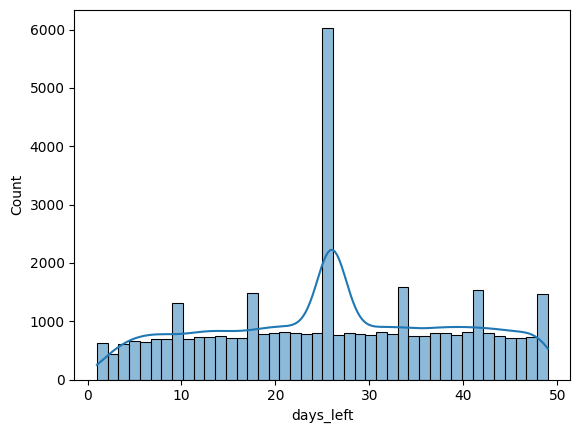

In [81]:
sns.histplot(x2["days_left"], kde=True)
plt.show()

### **The days left is well distributed with peaks occuring at values near 10, 20, 25, 35, 40 and 50. This shows people book their tickets before predefined days like 10 days, 15 days and a month. This is human attitude of pre-planning things before specific time periods**

### **Visualisation of airline variable using Bar Plot**

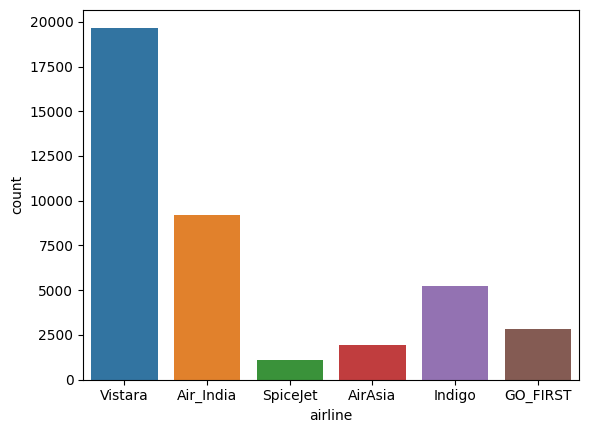

In [82]:
sns.countplot(x = x2["airline"])
plt.show()

### **From the above bar chart, it could be inferred that 6 airlines dominate the market, with Vistara being the frequently-flown airline and Spicejet being the least chosen airline. Air India has sufficient amount of travellers and it is followed by Indigo. GO_FIRST and AirAsia are having less travellers flying through them**

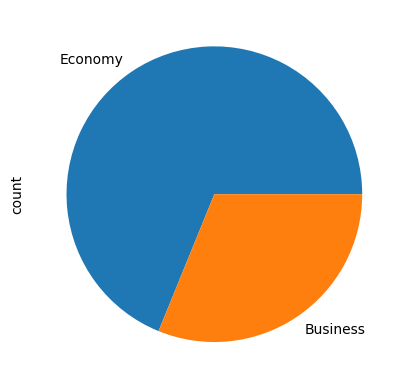

In [83]:
df["class"].value_counts().plot.pie()
plt.show()

### **From the above pie chart, it could be inferred that nearly 65% of the people travel using Economy Class and the remaining using business class**

# [](http://)**Scaling and Encoding Features**

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2)

In [39]:
enc = ColumnTransformer(transformers=[
    ("n1", OrdinalEncoder(), cat),
    ("n2", "passthrough", num)
])
enc1 = Pipeline(steps=[
    ("1", StandardScaler())
])
enc2 = StandardScaler()
xtr1 = enc.fit_transform(x_train)
#xtr1 = xtr.toarray()
xte1 = enc.fit_transform(x_test)
#xte1 = xte.toarray()
xtr = enc1.fit_transform(xtr1)
xte = enc1.fit_transform(xte1)
ytr = enc2.fit_transform(np.array(y_train).reshape(-1, 1))
yte = enc2.fit_transform(np.array(y_test).reshape(-1, 1))

In [40]:
scores = {}

# **Model Building and Testing**

## **Model-1: LinearRegression** 

In [41]:
model = LinearRegression()
model.fit(xtr, ytr)
ypr = model.predict(xte)
s = (r2_score(ypr, yte))
scores["LinearRegression"] = s
print(s)

0.8948048909081716


## **Model-2: SGDRegressor** 

In [13]:
model = SGDRegressor()
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))
scores["SGDRegressor"] = r2_score(ypr, yte)

0.8928478274527522


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Model-3: Lasso Regression** 

In [14]:
model = Lasso(alpha=1e-20)
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))
scores["Lasso"] = r2_score(ypr, yte)

0.8910616054533026


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e+03, tolerance: 3.200e+00
  model = cd_fast.enet_coordinate_descent(


## **Model-3: Ridge Regression** 

In [15]:
model = Ridge()
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))
scores["Ridge"] = r2_score(ypr, yte)

0.8910549690161309


In [16]:
model = LinearRegression()
from sklearn.model_selection import cross_val_score
cross_val_score(model, xte, yte, cv=5)

array([0.89798228, 0.9059805 , 0.8932853 , 0.90783652, 0.90779677])

## **Model-4: DecisionTree** 

In [17]:
model = DecisionTreeRegressor()
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))
scores["DecisionTreeRegressor"] = r2_score(ypr, yte)

0.9085002973682296


## **Model-5: RandomForestRegressor** 

In [18]:
model = RandomForestRegressor()
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))
scores["RandomForestRegressor"] = r2_score(ypr, yte)

/tmp/ipykernel_35/3516310654.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtr, ytr)


0.9499766913720714


## **Model-6: VotingRegressor** 

In [19]:
model = VotingRegressor(estimators=[("linear", LinearRegression()), ("ridge", Ridge())])
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))
scores["VotingRegressor"] = r2_score(ypr, yte)

0.8910582875451158


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Model-7: SVR** 

In [20]:
model = SVR()
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))
scores["SVR"] = r2_score(ypr, yte)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9435029288272139


## **Model-8: AdaBoostRegressor** 

In [21]:
model = AdaBoostRegressor()
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))
scores["AdaBoostRegressor"] = r2_score(ypr, yte)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9191109161280699


## **Model-9: Multi-Layer Perceptron** 

In [22]:
model = MLPRegressor()
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))
scores["MLPRegressor"] = r2_score(ypr, yte)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9484318403647323


## **Model-10: KNNRegressor** 

In [23]:
model = KNeighborsRegressor()
model.fit(xtr, ytr) 
ypr = model.predict(xte)
print(r2_score(ypr, yte))
scores["KNeighborsRegressor"] = r2_score(ypr, yte)

0.9413038613910386


# **Hyper-Parameter Tuning of 3 models**

### **RandomForestRegressor**

In [26]:
params = {
    "n_estimators" : [100, 200],
    "criterion" : ["squarred_error", "friedman_mse"],
    "max_depth" : [5, 20]
}
gcv = GridSearchCV(RandomForestRegressor(), params, cv=3, scoring="neg_mean_squared_error", return_train_score=True)
gcv.fit(xtr, ytr)
print(gcv.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

{'criterion': 'friedman_mse', 'max_depth': 20, 'n_estimators': 200}


In [27]:
model = gcv.best_estimator_
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))

/tmp/ipykernel_35/3120581990.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtr, ytr)


0.9501014670259506


In [24]:
hyper_parameters = {"RandomForestRegressor":{'criterion': 'friedman_mse', 'max_depth': 20, 'n_estimators': 200},
                   "MLPRegressor":{'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'solver': 'adam'},
                   "ElasticNet":{'alphas': None, 'copy_X': True, 'cv': 5, 'eps': 0.001, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'n_alphas': 100, 'n_jobs': None, 'positive': False, 'precompute': 'auto', 'random_state': 42, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': 0}}

In [ ]:
scores["ElasticNet_HyperParameter"] = 0.8947586676426709
scores["RandomForest_HyperParameter"] = 0.9501014670259506
scores["MLPRegressor_HyperParameter"] = 

### **MLPRegressor - Hyper Parameter Tuning**

In [28]:
params = {
    "solver" : ["lbfgs", "adam"],
    "activation" : ["relu","logistic"],
    "hidden_layer_sizes" : [(100,), (100, 50)]
}
gcv = GridSearchCV(MLPRegressor(), params, cv=3, scoring="neg_mean_squared_error", return_train_score=True)
gcv.fit(xtr, ytr)
print(gcv.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.

{'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}


In [ ]:
model = gcv.best_estimator_
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))

In [42]:
model = MLPRegressor(activation="relu", hidden_layer_sizes=(100, 50), solver="adam")
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9525033005246656


### **ElasticNet - Hyper Parameter Tuning**

In [ ]:
model = ElasticNetCV(
    l1_ratio=[0.1, 0.25, 0.5, 0.75, 0.9, 1.0],
    alphas=None,
    cv=5,
    random_state=42
)
model.fit(xtr, ytr)
ypr = model.predict(xte)
print(r2_score(ypr, yte))
print(model.get_params())

# **Predicting the values of the given test data and preparing for submitting in the competition**

In [43]:
dftest = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv")
dftes = imp1.fit_transform(dftest)
dftes1 = pd.DataFrame(dftes, columns=num+cat)
dfte = enc.fit_transform(dftes1)
dft1 = enc1.fit_transform(dfte)
dft1

array([[ 0.96291721,  0.92001958, -1.48197991, ..., -1.73187761,
        -1.34983357, -0.62819936],
       [-1.22702414, -1.16902726, -0.91066923, ..., -1.7315312 ,
        -0.11432402, -1.63001388],
       [ 0.41543187,  0.75617277, -0.33935855, ..., -1.73118479,
        -0.11432402,  1.37542969],
       ...,
       [ 0.96291721,  0.99077161, -0.91066923, ...,  1.73118479,
        -0.25967809, -0.16582342],
       [-1.22702414, -1.03869457,  0.23195214, ...,  1.7315312 ,
         0.68512333,  1.76074297],
       [ 0.96291721,  1.05407606,  0.23195214, ...,  1.73187761,
         0.73309017, -1.47588857]])

In [51]:
d = model.predict(dft1)
d1 = d.reshape(-1, 1)
d1

array([[-0.68271372],
       [-0.53982987],
       [-0.64451519],
       ...,
       [ 1.41354289],
       [ 1.36478351],
       [ 1.37001698]])

In [56]:
d2 = enc2.inverse_transform(d1)
d2

array([[ 5497.18205916],
       [ 8786.65801003],
       [ 6376.58962794],
       ...,
       [53757.26004404],
       [52634.72045534],
       [52755.20552798]])

In [64]:
d3 = d2.reshape(1, -1)
d4 = d3.ravel()
d4

array([ 5497.18205916,  8786.65801003,  6376.58962794, ...,
       53757.26004404, 52634.72045534, 52755.20552798])

In [65]:
submission = pd.DataFrame({"id": range(0,dftest.shape[0]), "price": d4}) 
submission.to_csv('submission.csv',index=False)
submission

,id,price
0,0,5497.182059
1,1,8786.658010
2,2,6376.589628
3,3,60569.790633
4,4,42788.314426
...,...,...
9995,9995,5438.180812
9996,9996,5031.636070
9997,9997,53757.260044
9998,9998,52634.720455


# **Comparison of the models using R-Square Score**
## **The R-Squared Scores of different models**
### 1. 'LinearRegression': 0.8910616054533027
### 2. 'SGDRegressor': 0.8928478274527522
### 3. 'Lasso': 0.8910616054533026
### 4. 'Ridge': 0.8910549690161309
### 5. 'DecisionTreeRegressor': 0.9085002973682296
### 6. 'RandomForestRegressor': 0.9499766913720714
### 7. 'VotingRegressor': 0.8910582875451158
### 8. 'SVR': 0.9435029288272139
### 9. 'AdaBoostRegressor': 0.9191109161280699
### 10. 'MLPRegressor': 0.9484318403647323
### 11. 'KNeighborsRegressor': 0.9413038613910386
### 12. 'RandomForestRegressor with Hyper Parameter Tuning': 0.9501014670259506
### 12. 'ElasticNet with Hyper Parameter Tuning': 0.8947586676426709
### 13. 'MLPRegressor with Hyper Parameter Tuning': 0.9589717167796157

#### These scores were obtained by running the above given code blocks and the r2 score caluclated on the splitted test dataset.